<a href="https://colab.research.google.com/github/ImAbhijeetPanda/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**   - Abhijeet Panda


# **Project Summary -**

The COVID-19 pandemic brought significant challenges worldwide, and understanding public sentiment during this time became essential for governments, organizations, and policymakers. This project focuses on building a classification model to predict the sentiment of COVID-19-related tweets. The dataset consists of anonymized tweets manually labeled with sentiments such as Extremely Positive, Positive, Neutral, Negative, and Extremely Negative. By analyzing these tweets, the project aims to gain insights into public opinion, identify emotional trends, and assist in making informed decisions during critical times.

The classification model developed in this project will enable organizations to monitor real-time sentiment trends, helping them better understand people's concerns and reactions to pandemic-related events. The insights can also support targeted communication strategies, improve public outreach, and enhance crisis management efforts. Ultimately, the project highlights the importance of sentiment analysis in addressing societal challenges and fostering effective decision-making during unprecedented global events.


---



# **GitHub Link -**

https://github.com/ImAbhijeetPanda/Coronavirus-Tweet-Sentiment-Analysis.git

# **Problem Statement**


## 1. Problem Statement
1. Classify the sentiment of COVID-19-related tweets into categories: Positive, Neutral, and Negative.  
2. Analyze public opinion to understand emotional trends during the pandemic.

## 2. Business Objective
1. Provide actionable insights to policymakers and organizations to improve communication strategies.  
2. Enable real-time monitoring of public sentiment to assist in crisis management and decision-making.

## 3. Business Constraints
1. The dataset is anonymized and manually tagged, limiting the availability of personal context.  
2. The model must deliver accurate predictions within a limited timeframe for real-time applications.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [181]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from collections import Counter
from wordcloud import WordCloud
import re

### Dataset Loading

In [182]:
# Load Dataset
df = pd.read_csv('/content/Coronavirus Tweets.csv', encoding='latin1')

### Dataset First View

In [183]:
# Dataset First Look
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

### Dataset Rows & Columns count

In [184]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [185]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [186]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [187]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Number of duplicated rows: 0


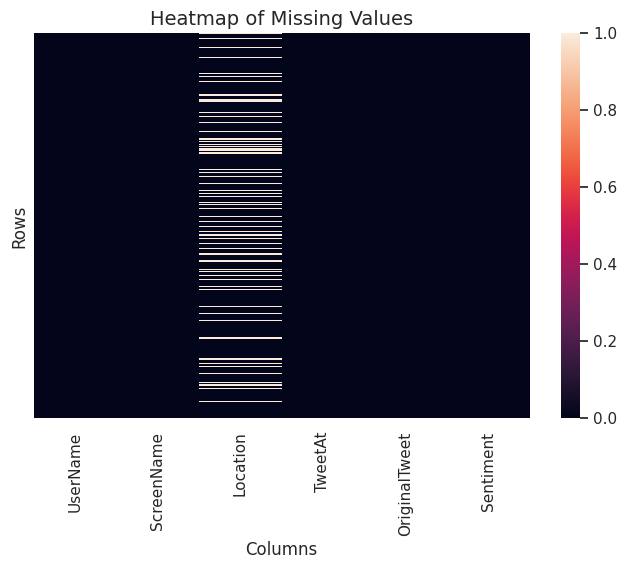

In [188]:
# Visualizing the missing values
# Count duplicated rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, annot=False)
plt.title('Heatmap of Missing Values', fontsize=14)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

### What did you know about your dataset?

1. The dataset contains **41,157 rows and 6 columns**: UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment.  
2. The **Location** column has **8,590 missing values**, while all other columns have no missing values.  
3. The dataset consists of both categorical (Location, Sentiment) and textual (OriginalTweet) data.  
4. The `Sentiment` column is the target variable for classification, with five distinct sentiment categories.  
5. The data types are a mix of object (string) and categorical fields, suitable for text preprocessing and machine learning.  


## ***2. Understanding Your Variables***

In [189]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [190]:
# Dataset Describe
df.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

### Variables Description

The dataset contains the following columns:
1. **Username**: Encoded usernames for privacy.
2. **ScreenName**: Encoded screen names.
3. **Location**: Geographical origin of the tweet.
4. **TweetAt**: Date when the tweet was posted.
5. **OriginalTweet**: Content of the tweet.
6. **Sentiment**: Target variable representing the sentiment of the tweet. Sentiments include:
   - Extremely Positive
   - Positive
   - Neutral
   - Negative
   - Extremely Negative


### Check Unique Values for each variable.

In [91]:
# Check Unique Values for each variable.
# Get the count of unique values for each column
unique_values_count = df.nunique()
print("Unique values count for each column:")
print(unique_values_count)

Unique values count for each column:
UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64


In [92]:
# Display the unique values in the 'Sentiment' column
unique_sentiment_values = df['Sentiment'].unique()
print("Unique values in the 'Sentiment' column:")
print(unique_sentiment_values)

Unique values in the 'Sentiment' column:
['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [96]:
# Drop the specified columns
df = df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'])

# Verify the columns are dropped
print(df.columns)

Index(['OriginalTweet', 'Sentiment'], dtype='object')


In [97]:
# Group the 'Sentiment' values into three categories
df['Sentiment Grouped'] = df['Sentiment'].replace({
    'Positive': 'Positive',
    'Extremely Positive': 'Positive',
    'Negative': 'Negative',
    'Extremely Negative': 'Negative'
})

### What all manipulations have you done and insights you found?

#### Manipulations Done

1. Dropped unnecessary columns: `UserName`, `ScreenName`, `Location`, and `TweetAt` to focus on the essential data for sentiment analysis.  
2. Grouped the `Sentiment` column into three broader categories:
   - Combined `Positive` and `Extremely Positive` into `Positive`.
   - Combined `Negative` and `Extremely Negative` into `Negative`.
   - Retained `Neutral` as is.

#### Insights Found

1. Simplifying the sentiment categories reduces the complexity of the target variable and makes the classification task more balanced and interpretable.  
2. The dataset is now cleaner, with fewer columns and a unified sentiment classification, allowing for more efficient model building.  


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 | Sentiment Distribution

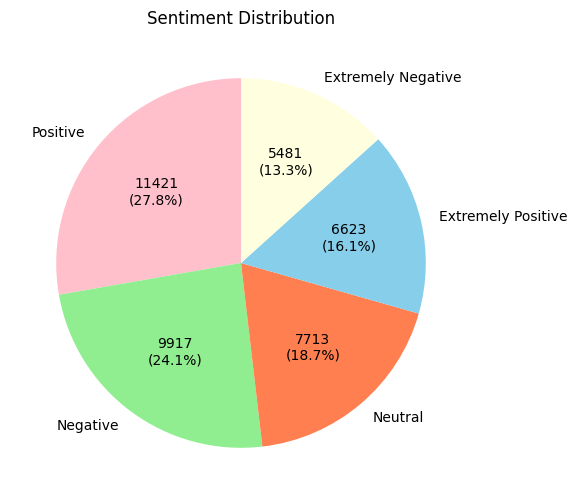

In [98]:
# Count the occurrences of each unique value in the 'Sentiment' column
sentiment_counts = df['Sentiment'].value_counts()

# Define a function to format the labels to show both count and percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))  # Calculate the absolute count
    return f"{absolute}\n({pct:.1f}%)"  # Return both count and percentage

# Plot the pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct=lambda pct: func(pct, sentiment_counts), startangle=90, colors=['pink', 'lightgreen', 'coral', 'skyblue', 'lightyellow'])

# Set the title and display the plot
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide the y-axis label
plt.show()

##### 1. Why did you pick the specific chart?

- A **pie chart** is used to visualize the proportional distribution of the sentiment categories effectively. It helps in understanding how each sentiment (Positive, Neutral, Negative, etc.) contributes to the total dataset at a glance.


##### 2. What is/are the insight(s) found from the chart?

- The **Positive** sentiment has the highest percentage (27.8%), followed by **Negative** (24.1%) and **Neutral** (18.7%).  
- Extreme sentiments (Extremely Positive and Extremely Negative) are relatively less common, contributing 16.1% and 13.3%, respectively.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Yes**, the insights can help businesses:
  - Identify the prevalence of positive sentiment, indicating overall optimism or satisfaction among users.
  - Address negative sentiments proactively by understanding concerns raised in the tweets.
  - Recognize the significant proportion of neutral sentiments, which may indicate opportunities to engage users further.

- **No insights lead to negative growth** as the analysis allows businesses to adapt and improve based on user feedback. Understanding sentiment distribution empowers better decision-making and tailored communication strategies, ensuring long-term positive impact.







#### Chart - 2 | Sentiment Distribution (Grouped)

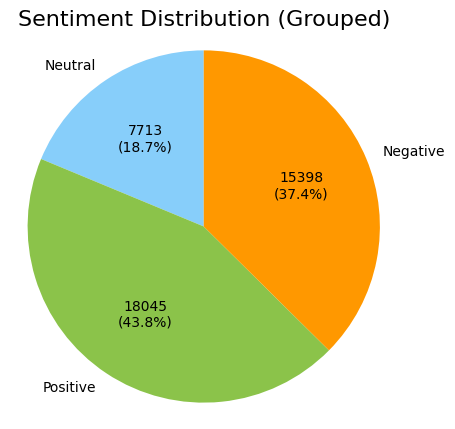

In [99]:
# Count the occurrences of each unique value in the new 'Sentiment Grouped' column
sentiment_counts_grouped = df['Sentiment Grouped'].value_counts()

# Ensure the correct order of the categories
sentiment_counts_grouped = sentiment_counts_grouped[['Neutral', 'Positive', 'Negative']]

# Define colors for the pie chart in the correct order
colors = ['#87CEFA', '#8BC34A', '#FF9800']  # Light Sky Blue for Neutral, Light Green for Positive, Orange for Negative

# Define a function to show both count and percentage
def func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))  # Calculate the absolute count
    return f"{absolute}\n({pct:.1f}%)"  # Return both count and percentage

# Plot the pie chart with normal styling
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts_grouped, labels=sentiment_counts_grouped.index, autopct=lambda pct: func(pct, sentiment_counts_grouped), startangle=90,
        colors=colors)

# Add a title
plt.title('Sentiment Distribution (Grouped)', fontsize=16)

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Chart - 3 | Word Cloud for Original Tweets

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


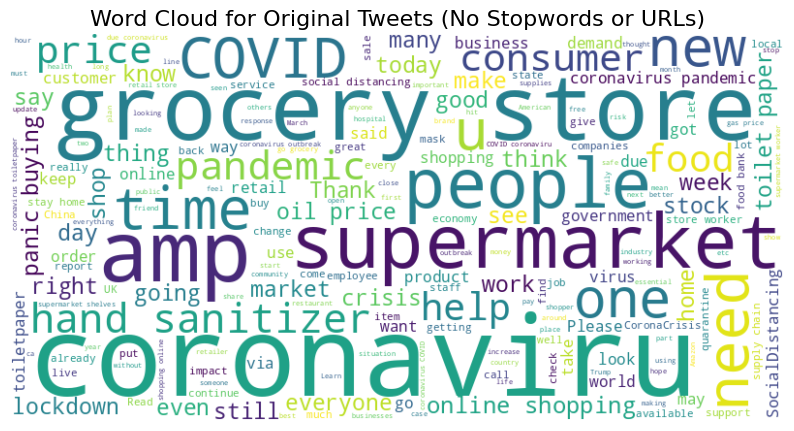

In [101]:
# Chart - 3 visualization code
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords and URLs from the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

    return ' '.join(filtered_words)

# Combine all the tweets in the 'OriginalTweet' column into one large string after preprocessing
text = ' '.join(df['OriginalTweet'].dropna().apply(preprocess_text))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Original Tweets', fontsize=16)
plt.show()

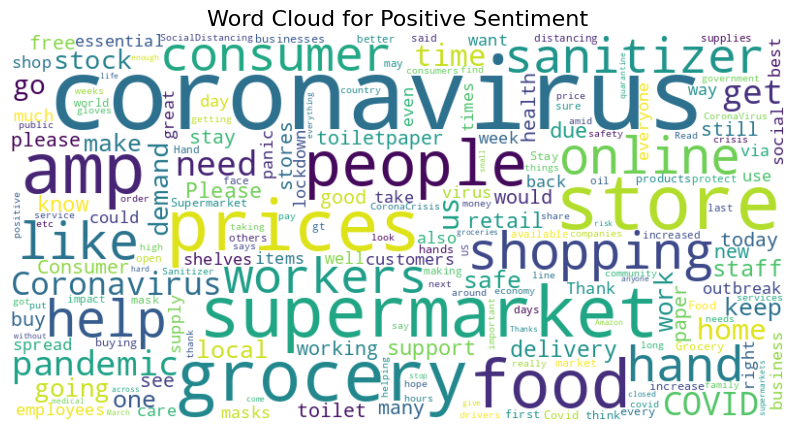

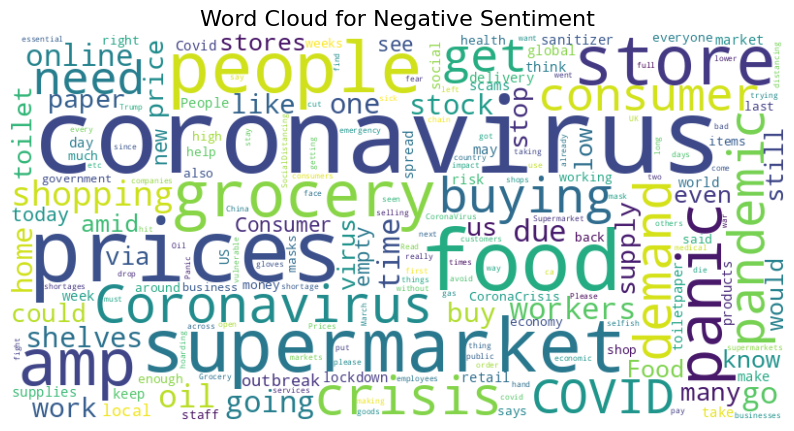

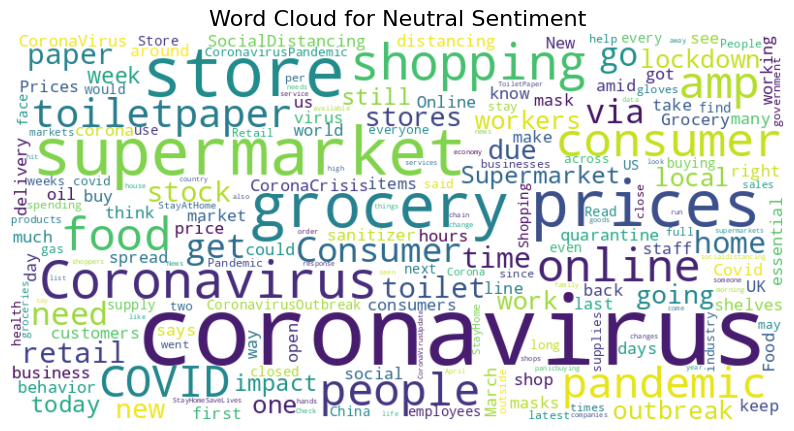

In [102]:
# nltk.download('punkt')
# nltk.download('stopwords')

# Remove stopwords and URLs from the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

    return filtered_words

# Function to generate word cloud for a specific sentiment
def generate_wordcloud_for_sentiment(sentiment_group, df):
    # Filter tweets by the sentiment group
    sentiment_tweets = df[df['Sentiment Grouped'] == sentiment_group]['OriginalTweet'].dropna()

    # Combine all the tweets into one string after preprocessing
    all_words = []
    for tweet in sentiment_tweets:
        all_words.extend(preprocess_text(tweet))

    # Create a frequency distribution of words
    word_freq = Counter(all_words)

    # Generate the word cloud from the word frequencies
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Word Cloud for {sentiment_group} Sentiment', fontsize=16)
    plt.show()

# Generate word clouds for each sentiment group
generate_wordcloud_for_sentiment('Positive', df)
generate_wordcloud_for_sentiment('Negative', df)
generate_wordcloud_for_sentiment('Neutral', df)

#### Chart - 4 | Word Cloud for 2-Word Occurrences (Bigrams)

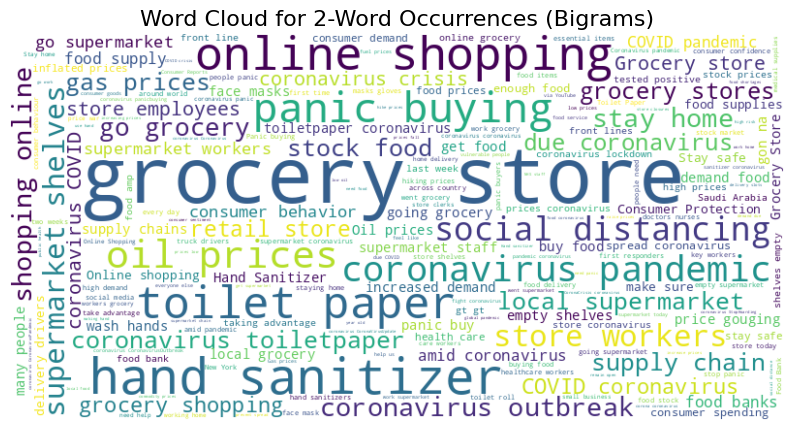

In [103]:
# Chart - 4 visualization code
# Download stopwords if you haven't already (run once)
# nltk.download('punkt')
# nltk.download('stopwords')

# Remove stopwords and URLs from the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

    return filtered_words

# Combine all the tweets in the 'OriginalTweet' column into one list of words after preprocessing
all_words = []
for tweet in df['OriginalTweet'].dropna():
    all_words.extend(preprocess_text(tweet))

# Generate bigrams from the filtered words
bigram_list = list(bigrams(all_words))

# Count the frequency of each bigram
bigram_freq = Counter(bigram_list)

# Convert bigrams to a format suitable for WordCloud (e.g., 'word1 word2': frequency)
bigram_freq_dict = {' '.join(bigram): freq for bigram, freq in bigram_freq.items()}

# Create the word cloud from bigrams
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for 2-Word Occurrences (Bigrams)', fontsize=16)
plt.show()

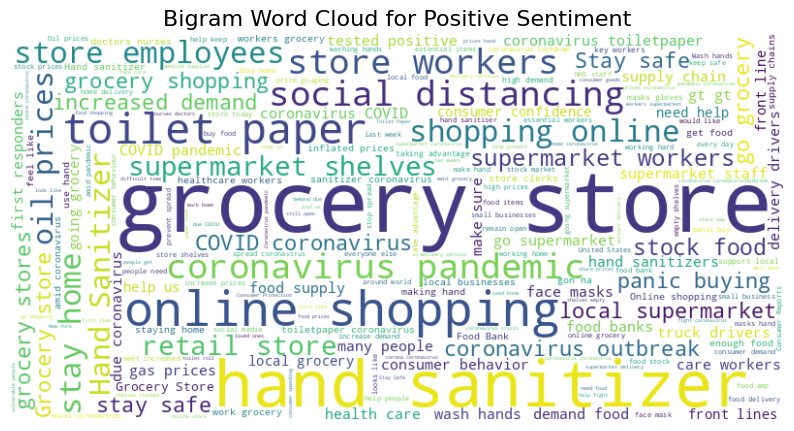

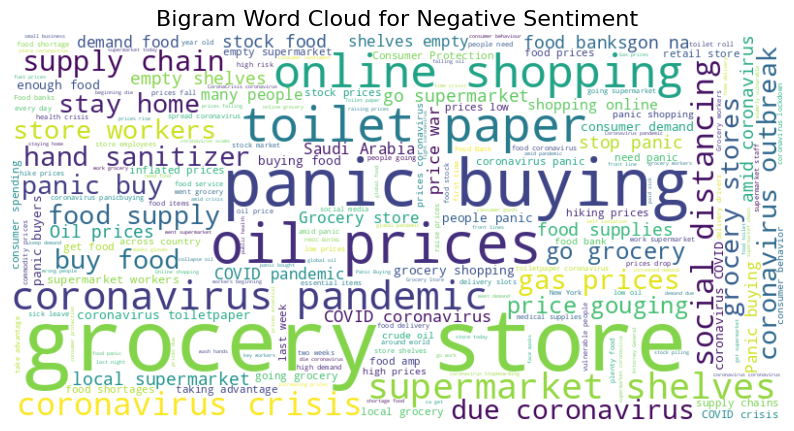

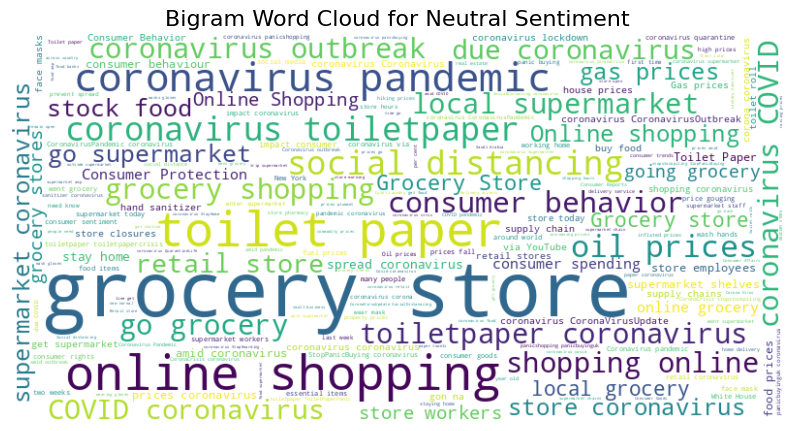

In [104]:
# Download stopwords if you haven't already (run once)
# nltk.download('punkt')
# nltk.download('stopwords')

# Remove stopwords and URLs from the text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

    return filtered_words

# Function to generate word cloud for bigrams in a specific sentiment group
def generate_bigram_wordcloud_for_sentiment(sentiment_group, df):
    # Filter tweets by the sentiment group
    sentiment_tweets = df[df['Sentiment Grouped'] == sentiment_group]['OriginalTweet'].dropna()

    # Combine all the tweets into one list of words after preprocessing
    all_words = []
    for tweet in sentiment_tweets:
        all_words.extend(preprocess_text(tweet))

    # Generate bigrams from the filtered words
    bigram_list = list(bigrams(all_words))

    # Count the frequency of each bigram
    bigram_freq = Counter(bigram_list)

    # Convert bigrams to a format suitable for WordCloud (e.g., 'word1 word2': frequency)
    bigram_freq_dict = {' '.join(bigram): freq for bigram, freq in bigram_freq.items()}

    # Create the word cloud from bigrams
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq_dict)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Bigram Word Cloud for {sentiment_group} Sentiment', fontsize=16)
    plt.show()

# Generate bigram word clouds for each sentiment group
generate_bigram_wordcloud_for_sentiment('Positive', df)
generate_bigram_wordcloud_for_sentiment('Negative', df)
generate_bigram_wordcloud_for_sentiment('Neutral', df)

#### Chart - 5 | Tweet Length Distribution by Sentiment

<ipython-input-110-2691784a54a9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Sentiment', y='Tweet Length', data=df, palette="muted")


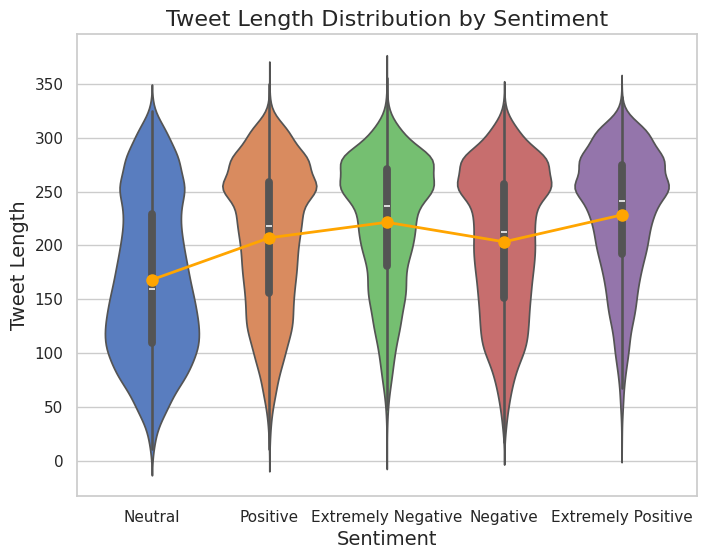

In [110]:
# Chart - 5 visualization code
# Create a new column for tweet length (number of characters in each tweet)
df['Tweet Length'] = df['OriginalTweet'].apply(lambda x: len(str(x)))

# Set a color palette for better aesthetics
sns.set(style="whitegrid")

# Violin plot for tweet length by sentiment
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='Sentiment', y='Tweet Length', data=df, palette="muted")

# Calculate average tweet length for each sentiment category
avg_values = df.groupby('Sentiment')['Tweet Length'].mean()

# Sort the values by sentiment order for the line
ordered_sentiments = ['Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive']
avg_values = avg_values[ordered_sentiments]

# Plot a line connecting the average points
plt.plot(avg_values.index, avg_values.values, color='orange', marker='o', linestyle='-', linewidth=2, markersize=8)

# Title and labels
plt.title('Tweet Length Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Tweet Length', fontsize=14)

# Display the plot
plt.show()

<ipython-input-111-57f14c2824f7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Sentiment Grouped', y='Tweet Length', data=df, palette="muted")


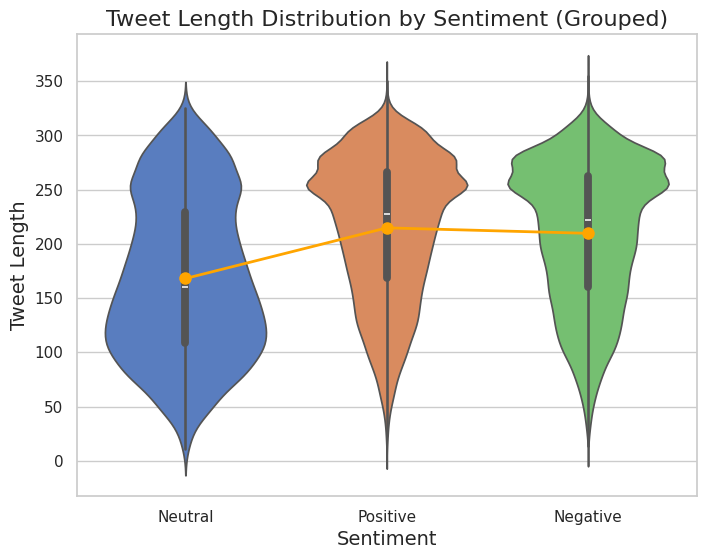

In [111]:
# Create a new column for tweet length (number of characters in each tweet)
df['Tweet Length'] = df['OriginalTweet'].apply(lambda x: len(str(x)))

# Set a color palette for better aesthetics
sns.set(style="whitegrid")

# Violin plot for tweet length by sentiment
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='Sentiment Grouped', y='Tweet Length', data=df, palette="muted")

# Calculate average tweet length for each sentiment category
avg_values = df.groupby('Sentiment Grouped')['Tweet Length'].mean()

# Sort the values by sentiment order for the line
ordered_sentiments = ['Neutral', 'Positive', 'Negative']
avg_values = avg_values[ordered_sentiments]

# Plot a line connecting the average points
plt.plot(avg_values.index, avg_values.values, color='orange', marker='o', linestyle='-', linewidth=2, markersize=8)

# Title and labels
plt.title('Tweet Length Distribution by Sentiment (Grouped)', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Tweet Length', fontsize=14)

# Display the plot
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### Textual Data Preprocessing

In [121]:
df_ml = df.copy()

In [122]:
df_ml.columns

Index(['OriginalTweet', 'Sentiment', 'Sentiment Grouped', 'Tweet Length'], dtype='object')

#### 1. Expand Contraction

In [123]:
# Expand Contraction

In [124]:
pip install contractions

In [125]:
import contractions

# Expand contractions in the OriginalTweet column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].apply(lambda text: contractions.fix(text))

# Verify the expanded text
print(df_ml['OriginalTweet'].head())

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
Name: OriginalTweet, dtype: object


#### 2. Lower Casing

In [127]:
# Lower Casing
# Convert the OriginalTweet column to lowercase
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].str.lower()

# Verify the result
print(df_ml['OriginalTweet'].head())

0    @menyrbie @phil_gahan @chrisitv https://t.co/i...
1    advice talk to your neighbours family to excha...
2    coronavirus australia: woolworths to give elde...
3    my food stock is not the only one which is emp...
4    me, ready to go at supermarket during the #cov...
Name: OriginalTweet, dtype: object


#### 3. Removing Punctuations

In [128]:
# Remove Punctuations
import string

# Remove punctuation from the OriginalTweet column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

# Verify the result
print(df_ml['OriginalTweet'].head())

0    menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: OriginalTweet, dtype: object


#### 4. Removing URLs & Removing words and digits contain digits.

In [130]:
# Remove URLs & Remove words and digits contain digits
# Function to clean text: remove URLs and non-alphanumeric characters
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove non-alphanumeric characters and replace with a space
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    # Remove extra spaces and convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip().lower()
    return text

# Apply the function to the 'OriginalTweet' column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].apply(clean_text)

# Verify the result
print(df_ml['OriginalTweet'].head())


0                  menyrbie philgahan chrisitv and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: OriginalTweet, dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [132]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download the stopwords set
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply the function to the OriginalTweet column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].apply(remove_stopwords)

# Verify the result
print(df_ml['OriginalTweet'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                          menyrbie philgahan chrisitv
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock one empty please panic enough food ...
4    ready go supermarket covid19 outbreak paranoid...
Name: OriginalTweet, dtype: object


In [134]:
# Remove White spaces
# Function to remove extra white spaces
def remove_extra_whitespaces(text):
    return ' '.join(text.split())

# Apply the function to the OriginalTweet column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].apply(remove_extra_whitespaces)

# Verify the result
print(df_ml['OriginalTweet'].head())

0                          menyrbie philgahan chrisitv
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock one empty please panic enough food ...
4    ready go supermarket covid19 outbreak paranoid...
Name: OriginalTweet, dtype: object


#### 6. Rephrase Text

In [136]:
# Rephrase Text
import nltk
from nltk.corpus import wordnet
import random
from tqdm import tqdm

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to get synonyms
def get_synonym(word):
    synonyms = wordnet.synsets(word)
    if synonyms:
        # Get the first synonym of the word
        synonym = random.choice(synonyms).lemmas()[0].name()
        return synonym
    return word

# Function to rephrase text by replacing words with synonyms
def rephrase_using_synonyms(text):
    words = text.split()
    rephrased_words = []

    for word in words:
        # Try to replace word with its synonym
        rephrased_words.append(get_synonym(word))

    return ' '.join(rephrased_words)

# Use tqdm to show progress bar when applying the rephrase function
tqdm.pandas()

# Apply the function to the OriginalTweet column and save it in the same column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].progress_apply(rephrase_using_synonyms)

# Verify the result
print(df_ml[['OriginalTweet']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|██████████| 41157/41157 [00:14<00:00, 2797.47it/s]

                                       OriginalTweet
0                        menyrbie philgahan chrisitv
1  advice talk neighbor class exchange telephone ...
2  coronavirus Australia Woolworth move_over aged...
3  food stock one empty please panic enough food ...
4  ready fail supermarket covid19 outbreak parano...


#### 7. Tokenization

In [138]:
# Tokenization
import nltk
nltk.download('punkt_tab')

# Function for word tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply the function to the 'OriginalTweet' column and store it back in the same column
df_ml['OriginalTweet'] = df_ml['OriginalTweet'].apply(tokenize_text)

# Verify the result
print(df_ml[['OriginalTweet']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                       OriginalTweet
0                    [menyrbie, philgahan, chrisitv]
1  [advice, talk, neighbor, class, exchange, tele...
2  [coronavirus, Australia, Woolworth, move_over,...
3  [food, stock, one, empty, please, panic, enoug...
4  [ready, fail, supermarket, covid19, outbreak, ...


#### 8. Text Normalization

In [140]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Loop through each row in the DataFrame and lemmatize the 'OriginalTweet' column
for i in range(0, len(df_ml['OriginalTweet'])):
    # 'OriginalTweet' already contains tokenized words, so we can directly apply lemmatization
    words = df_ml['OriginalTweet'][i]

    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a sentence, separated by spaces
    df_ml.at[i, 'OriginalTweet'] = ' '.join(lemmatized_words)
# Verify the result
print(df_ml[['OriginalTweet']].head())

                                       OriginalTweet
0                        menyrbie philgahan chrisitv
1  advice talk neighbor class exchange telephone ...
2  coronavirus Australia Woolworth move_over aged...
3  food stock one empty please panic enough food ...
4  ready fail supermarket covid19 outbreak parano...


## ***6. ML Model Implementation***

### ML Model - 1 | LSTM RNN

In [142]:
df_ml1 = df_ml.copy()

####Text Embedding

In [143]:
from tensorflow.keras.preprocessing.text import one_hot

# Example Corpus (Replace with your actual corpus)
corpus = df_ml1['OriginalTweet'].astype(str).tolist()

# Define vocabulary size (the number of unique words you want to consider)
voc_size = 5000  # You can adjust this based on your dataset

# One-hot encode each sentence in the corpus
onehot_repr = [one_hot(words, voc_size) for words in corpus]

# Verify the result
print(onehot_repr[:5])  # Print the first 5 encoded sentences

[[3571, 2568, 3056], [605, 2465, 4578, 1096, 780, 719, 18, 587, 2569, 2765, 706, 97, 126, 1093, 4578, 1644, 4160, 305, 1076, 4140, 4179, 4447, 3576, 2618, 2432, 4417, 2815, 4417, 3451, 769, 4933, 3635, 950], [2871, 3659, 4646, 2553, 2587, 1871, 4384, 206, 4307, 377, 3444, 4561, 370], [1986, 1931, 3137, 1449, 4067, 4046, 631, 1986, 683, 1248, 1945, 318, 4819, 318, 2000, 2627, 4561, 4561, 2871, 637, 2694, 2541], [4486, 2619, 3687, 4561, 370, 220, 1986, 3962, 3549, 1449, 2871, 1516, 2106, 4067, 4046, 3204, 3302, 270, 2432, 801, 637]]


In [144]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the sentence length for padding
sent_length = 20

# Pad the sequences with a maximum length of 30
embedded_docs = pad_sequences(onehot_repr, padding='post', maxlen=sent_length)

# Verify the result
print(embedded_docs[:5])  # Display the first 5 padded sequences

[[3571 2568 3056    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [1093 4578 1644 4160  305 1076 4140 4179 4447 3576 2618 2432 4417 2815
  4417 3451  769 4933 3635  950]
 [2871 3659 4646 2553 2587 1871 4384  206 4307  377 3444 4561  370    0
     0    0    0    0    0    0]
 [3137 1449 4067 4046  631 1986  683 1248 1945  318 4819  318 2000 2627
  4561 4561 2871  637 2694 2541]
 [2619 3687 4561  370  220 1986 3962 3549 1449 2871 1516 2106 4067 4046
  3204 3302  270 2432  801  637]]


#### Model

In [145]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model = Sequential()

# Add the Embedding layer
model.add(Embedding(input_dim=voc_size, output_dim=100, input_length=sent_length))

# Add the LSTM layer
model.add(Bidirectional(LSTM(units=100)))

# Add the Dense output layer
model.add(Dense(units=3, activation='softmax'))  # 3 classes for sentiment

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, sent_length))
# Display the model summary
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 20, 100)             │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 200)                 │         160,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             603 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 661,403 (2.52 MB)

 Trainable params: 661,403 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

#### Splitting

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'df_ml' is your DataFrame with 'OriginalTweet' as X and 'Sentiment' as y
X = embedded_docs.copy()  # Features (messages)
y = df_ml1['Sentiment Grouped']      # Labels (sentiment)

# Convert the labels (y) to numeric values (if they are strings) using LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Encode the sentiment labels

# Split the data into training and testing sets (80% training, 20% testing) while maintaining the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Further split the training data to create a validation set (80% training, 20% validation) while maintaining the class distribution
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Verify the split (size of the datasets)
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Test data size: {len(X_test)}")

# Verify the class distribution
print(f"Training label distribution: {np.bincount(y_train)}")
print(f"Validation label distribution: {np.bincount(y_val)}")
print(f"Test label distribution: {np.bincount(y_test)}")

Training data size: 26340
Validation data size: 6585
Test data size: 8232
Training label distribution: [ 9854  4936 11550]
Validation label distribution: [2464 1234 2887]
Test label distribution: [3080 1543 3609]


In [147]:
# Calculate percentage distribution for each set
train_percent = np.bincount(y_train) / len(y_train) * 100
val_percent = np.bincount(y_val) / len(y_val) * 100
test_percent = np.bincount(y_test) / len(y_test) * 100

print(f"Training set class distribution (percent): {train_percent}")
print(f"Validation set class distribution (percent): {val_percent}")
print(f"Test set class distribution (percent): {test_percent}")

Training set class distribution (percent): [37.41078208 18.73955961 43.84965831]
Validation set class distribution (percent): [37.41837509 18.73955961 43.8420653 ]
Test set class distribution (percent): [37.41496599 18.74392614 43.84110787]


#### Model Training

In [148]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define a learning rate reduction callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Fit the model with the learning rate scheduler
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[lr_scheduler])

Epoch 1/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.5601 - loss: 0.9124 - val_accuracy: 0.6680 - val_loss: 0.7639 - learning_rate: 0.0010
Epoch 2/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.7156 - loss: 0.6832 - val_accuracy: 0.6738 - val_loss: 0.7566 - learning_rate: 0.0010
Epoch 3/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7628 - loss: 0.5920 - val_accuracy: 0.6636 - val_loss: 0.7924 - learning_rate: 0.0010
Epoch 4/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.8175 - loss: 0.4708 - val_accuracy: 0.6501 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 5/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.8743 - loss: 0.3457 - val_accuracy: 0.6396 - val_loss: 1.0207 - learning_rate: 0.0010
Epoch 6/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9150 - loss: 0.2384 - val_accuracy: 0.6172 - val_loss: 1.3262 - learning_rate: 0.0010
Epoch 7/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9477 - l

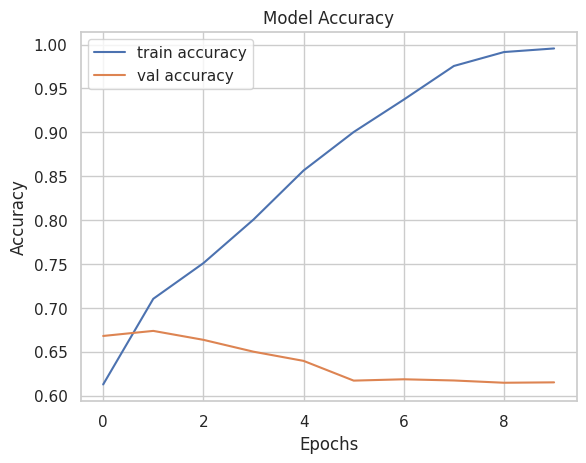

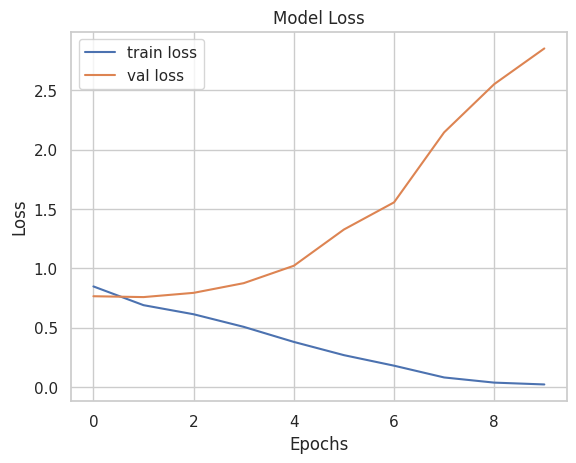

In [149]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### ML Model - 2 | TFIDF Vectorizer
1. Logistic Regression Model
2. Multinomial Naive Bayes classifier
3. Random Forest Classifier
4. SVM model

In [193]:
df_ml2 = df_ml.copy()

#### TFIDF Vectorizer

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the 'OriginalTweet' column from the DataFrame
tweets = df_ml2['OriginalTweet']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=30000)

# Compute the TF-IDF matrix for the tweets
tfidf_matrix = vectorizer.fit_transform(tweets)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the first 5 rows of the TF-IDF DataFrame
print(tfidf_df.head())

    00  000  000s  001  00am  00pm   01  010  0113  01273  ...  zurfi  \
0  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...    0.0   
1  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...    0.0   
2  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...    0.0   
3  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...    0.0   
4  0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0   0.0    0.0  ...    0.0   

   zusammenhalten  zuschl  zusendung  zvikwereti  zwd  zweli  zwoferink  \
0             0.0     0.0        0.0         0.0  0.0    0.0        0.0   
1             0.0     0.0        0.0         0.0  0.0    0.0        0.0   
2             0.0     0.0        0.0         0.0  0.0    0.0        0.0   
3             0.0     0.0        0.0         0.0  0.0    0.0        0.0   
4             0.0     0.0        0.0         0.0  0.0    0.0        0.0   

   zxspectrom  zymosis  
0         0.0      0.0  
1         0.0      0.0  
2         0.0      0.0  
3         

In [199]:
# Calculate the mean TF-IDF score for each word
word_weights = tfidf_df.mean().sort_values(ascending=False)

# Display the top 60 words and their corresponding weights
top_60_words = word_weights.head(60)
print(top_60_words)


coronavirus                0.032995
covid19                    0.031679
supermarket                0.020408
price                      0.019889
food                       0.018818
consumer                   0.015164
store                      0.013359
line                       0.012894
grocery_store              0.012134
nineteen                   0.011895
people                     0.011819
grocery                    0.011718
on                         0.011645
shop                       0.010967
pandemic                   0.010737
covid                      0.010584
one                        0.009426
panic                      0.009100
buy                        0.008816
sanitizer                  0.008676
ampere                     0.007843
go                         0.007629
time                       0.007598
hand                       0.007579
adenosine_monophosphate    0.007494
toiletpaper                0.007289
home                       0.006754
like                       0

#### Splitting

In [152]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_ml2['Sentiment Grouped'])

# Check the encoded classes
print("Encoded classes:", label_encoder.classes_)  # ['Negative', 'Neutral', 'Positive']


Encoded classes: ['Negative' 'Neutral' 'Positive']


In [153]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (32925, 30000)
Testing size: (8232, 30000)


#### Logistic Regression Model

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=32)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.7436831875607386

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.75      0.75      3062
     Neutral       0.68      0.51      0.58      1553
    Positive       0.75      0.84      0.79      3617

    accuracy                           0.74      8232
   macro avg       0.73      0.70      0.71      8232
weighted avg       0.74      0.74      0.74      8232



#### Multinomial Naive Bayes classifier

In [155]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=label_encoder.classes_))


Accuracy (Naive Bayes): 0.6328960155490768

Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.63      0.66      3062
     Neutral       0.80      0.04      0.08      1553
    Positive       0.59      0.89      0.71      3617

    accuracy                           0.63      8232
   macro avg       0.70      0.52      0.49      8232
weighted avg       0.67      0.63      0.58      8232



#### Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


Accuracy (Random Forest): 0.6869533527696793

Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.67      0.69      3062
     Neutral       0.61      0.51      0.56      1553
    Positive       0.69      0.78      0.74      3617

    accuracy                           0.69      8232
   macro avg       0.67      0.65      0.66      8232
weighted avg       0.68      0.69      0.68      8232



#### SVM model

In [157]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_clf = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.7380952380952381

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.74      0.74      3062
     Neutral       0.65      0.55      0.59      1553
    Positive       0.76      0.81      0.79      3617

    accuracy                           0.74      8232
   macro avg       0.72      0.70      0.71      8232
weighted avg       0.73      0.74      0.74      8232



In [158]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_clf = SVC(kernel='rbf', random_state=42)
# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.7315354713313897

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.75      0.75      3062
     Neutral       0.71      0.44      0.54      1553
    Positive       0.73      0.84      0.78      3617

    accuracy                           0.73      8232
   macro avg       0.73      0.68      0.69      8232
weighted avg       0.73      0.73      0.72      8232



In [159]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_clf = SVC(kernel='poly', random_state=42)
# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.564625850340136

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.34      0.48      3062
     Neutral       0.88      0.06      0.12      1553
    Positive       0.51      0.97      0.67      3617

    accuracy                           0.56      8232
   macro avg       0.73      0.46      0.42      8232
weighted avg       0.69      0.56      0.50      8232



### ML Model - 3 | Word2Vec
1. Logistic Regression Model
2. Multinomial Naive Bayes classifier
3. Random Forest Classifier
4. SVM model

In [200]:
df_ml3 = df_ml.copy()

#### Word2Vec

In [201]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Tokenize each tweet in 'OriginalTweet' from df_ml3
tokenized_tweets = df_ml3['OriginalTweet'].apply(lambda x: x.split())

# Train Word2Vec model on tokenized tweets
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=2, workers=4)

# Check the Word2Vec vocabulary size
print(f"Vocabulary Size: {len(word2vec_model.wv)}")

# Function to create tweet vectors by averaging word vectors
def compute_tweet_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)  # Return a zero vector if no words in the tweet are in the vocabulary

# Compute tweet vectors for all tweets in df_ml3
vector_size = 100  # Same as the Word2Vec vector size
tweet_vectors = np.array([compute_tweet_vector(tokens, word2vec_model, vector_size) for tokens in tokenized_tweets])

Vocabulary Size: 21057


#### Splitting

In [162]:
# Encode the target labels ('Sentiment Grouped') into numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_ml3['Sentiment Grouped'])  # Converts 'Neutral', 'Positive', 'Negative' to [0, 1, 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweet_vectors, y, test_size=0.2, random_state=42)

#### Logistic Regression Classifier

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression Classifier
classifier_lr = LogisticRegression(max_iter=1000, random_state=42)
classifier_lr.fit(X_train, y_train)

# Make predictions with Logistic Regression
y_pred_lr = classifier_lr.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy on df_ml3: {accuracy_lr:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))

Logistic Regression Model Accuracy on df_ml3: 0.57

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.56      0.56      3062
     Neutral       0.53      0.28      0.37      1553
    Positive       0.58      0.71      0.64      3617

    accuracy                           0.57      8232
   macro avg       0.56      0.52      0.52      8232
weighted avg       0.57      0.57      0.56      8232



#### Naive Bayes Classifier

In [203]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train a Naive Bayes Classifier (GaussianNB) on the Word2Vec embeddings
classifier_nb_gaussian = GaussianNB()
classifier_nb_gaussian.fit(X_train, y_train)

# Make predictions with Naive Bayes (GaussianNB)
y_pred_nb_gaussian = classifier_nb_gaussian.predict(X_test)

# Evaluate the Gaussian Naive Bayes model
accuracy_nb_gaussian = accuracy_score(y_test, y_pred_nb_gaussian)
print(f"Gaussian Naive Bayes Model Accuracy on df_ml3: {accuracy_nb_gaussian:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb_gaussian, target_names=label_encoder.classes_))

Gaussian Naive Bayes Model Accuracy on df_ml3: 0.51

Classification Report:
               precision    recall  f1-score   support

    Negative       0.52      0.48      0.50      3062
     Neutral       0.39      0.40      0.39      1553
    Positive       0.55      0.58      0.57      3617

    accuracy                           0.51      8232
   macro avg       0.49      0.49      0.49      8232
weighted avg       0.51      0.51      0.51      8232



#### Random Forest Classifier

In [165]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Word2Vec Model Accuracy on df_ml3: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Word2Vec Model Accuracy on df_ml3: 0.57

Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.55      0.55      3062
     Neutral       0.55      0.31      0.40      1553
    Positive       0.58      0.69      0.63      3617

    accuracy                           0.57      8232
   macro avg       0.56      0.52      0.53      8232
weighted avg       0.56      0.57      0.56      8232



#### SVM model

In [166]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_clf = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.5680272108843537

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.52      0.55      3062
     Neutral       0.57      0.23      0.32      1553
    Positive       0.57      0.75      0.65      3617

    accuracy                           0.57      8232
   macro avg       0.57      0.50      0.51      8232
weighted avg       0.57      0.57      0.55      8232



In [167]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_clf = SVC(kernel='rbf', random_state=42)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.5739795918367347

Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.53      0.55      3062
     Neutral       0.60      0.24      0.34      1553
    Positive       0.57      0.75      0.65      3617

    accuracy                           0.57      8232
   macro avg       0.58      0.51      0.52      8232
weighted avg       0.58      0.57      0.56      8232



### ML Model - 4 | Avg Word2Vec
1. Logistic Regression Model
2. Multinomial Naive Bayes classifier
3. Random Forest Classifier
4. SVM model

In [168]:
df_ml4 = df_ml.copy()

#### Avg Word2Vec

In [191]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Tokenize each tweet in 'OriginalTweet' from df_ml4
tokenized_tweets = df_ml4['OriginalTweet'].apply(lambda x: x.split())

# Train a Word2Vec model on tokenized tweets
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=2, workers=4)

# Check the Word2Vec vocabulary size
print(f"Vocabulary Size: {len(word2vec_model.wv)}")

# Function to compute average Word2Vec for each tweet
def compute_avg_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)  # Return a zero vector if no words in the tweet are in the vocabulary

# Step 5: Compute average Word2Vec for all tweets in df_ml4
vector_size = 100  # Same as the Word2Vec vector size
tweet_vectors = np.array([compute_avg_vector(tokens, word2vec_model, vector_size) for tokens in tokenized_tweets])


Vocabulary Size: 21057


#### Data Splitting

In [170]:
# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_ml4['Sentiment Grouped'])  # Encodes 'Neutral', 'Positive', 'Negative' to [0, 1, 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweet_vectors, y, test_size=0.2, random_state=42)

#### Logistic Regression Classifier

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression Classifier
classifier_lr = LogisticRegression(max_iter=1000, random_state=42)
classifier_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = classifier_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy on df_ml4: {accuracy_lr:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Logistic Regression Model Accuracy on df_ml4: 0.57

Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.53      0.55      3062
     Neutral       0.60      0.24      0.34      1553
    Positive       0.57      0.75      0.65      3617

    accuracy                           0.57      8232
   macro avg       0.58      0.51      0.52      8232
weighted avg       0.58      0.57      0.56      8232



#### Naive Bayes Classifier

In [192]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Apply MinMaxScaler to ensure non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Naive Bayes Classifier (MultinomialNB)
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = classifier_nb.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Model Accuracy on df_ml4: {accuracy_nb:.2f}")
print("\nClassification Report:\n", classification_report(y_test,  y_pred_nb, target_names=label_encoder.classes_))

Naive Bayes Model Accuracy on df_ml4: 0.46

Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      0.08      0.14      3062
     Neutral       0.00      0.00      0.00      1553
    Positive       0.45      0.98      0.62      3617

    accuracy                           0.46      8232
   macro avg       0.36      0.35      0.25      8232
weighted avg       0.43      0.46      0.32      8232



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Random Forest Classifier

In [173]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Average Word2Vec Model Accuracy on df_ml4: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Average Word2Vec Model Accuracy on df_ml4: 0.57

Classification Report:
               precision    recall  f1-score   support

    Negative       0.55      0.55      0.55      3062
     Neutral       0.55      0.31      0.40      1553
    Positive       0.58      0.69      0.63      3617

    accuracy                           0.57      8232
   macro avg       0.56      0.52      0.53      8232
weighted avg       0.56      0.57      0.56      8232



#### SVM model

In [174]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_clf = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf', 'poly', etc.

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.5685131195335277

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.53      0.55      3062
     Neutral       0.57      0.22      0.32      1553
    Positive       0.57      0.75      0.64      3617

    accuracy                           0.57      8232
   macro avg       0.57      0.50      0.51      8232
weighted avg       0.57      0.57      0.55      8232



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

#### Evaluation Metrics Considered for Positive Business Impact

1. **Accuracy**:
   - Evaluates the overall performance of the model by measuring the percentage of correctly predicted sentiments. It ensures the model provides reliable results.

2. **Precision** (especially for Positive and Negative classes):  
   - Measures the proportion of correctly predicted Positive/Negative sentiments out of all predicted Positive/Negative sentiments. Ensures the model minimizes false positives, which is crucial for actionable insights.

3. **Recall**:  
   - Measures the ability to identify all actual Positive/Negative sentiments. High recall ensures no critical sentiments (especially Negative ones) are overlooked.

4. **F1-Score**:  
   - Balances Precision and Recall, providing a harmonic mean. It is particularly useful when the dataset is imbalanced among sentiment classes.

5. **Confusion Matrix**:  
   - Offers a detailed breakdown of predictions (True Positives, True Negatives, False Positives, False Negatives) to assess where the model performs well and where it struggles.

### Why These Metrics?
- These metrics ensure the model identifies critical sentiments (like Negative tweets) accurately, enabling timely interventions to prevent potential customer dissatisfaction.
- High Precision and Recall for Positive sentiments help target positive users for marketing or engagement.
- F1-Score ensures a balance between precision and recall, reducing the risk of misclassification, leading to actionable and reliable business decisions.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

#### Final Model Chosen: TFIDF Logistic Regression

##### **Reason for Choosing This Model:**
1. **Best Accuracy**:  
   - Achieved an accuracy of **74.37%**, which outperformed all other tested models.

2. **Balanced Performance**:  
   - The model demonstrates **high F1-scores** across all sentiment classes (Negative, Neutral, Positive).  
   - Particularly strong performance in detecting **Positive** and **Negative** sentiments, which are critical for understanding customer feedback and business sentiment.

3. **Efficiency and Scalability**:  
   - The combination of TFIDF vectorization and Logistic Regression ensures computational efficiency, making it well-suited for large-scale data and real-time predictions.

4. **Interpretability**:  
   - Logistic Regression allows for easy interpretation of feature importance, helping understand how individual words (features) influence sentiment classification. This transparency enhances trust in model outcomes.

### Overall Business Impact:
- With its reliable predictions and clear interpretability, this model provides actionable insights to monitor customer sentiments effectively.  
- The robust performance across sentiment categories ensures informed decision-making, leading to a **positive business impact** through improved customer understanding and targeted strategies.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Here is the updated explanation with the words from your list:

### Explanation of the Model and Feature Importance:

#### Model Overview:
1. **TF-IDF Vectorization**:
   - The **TF-IDF (Term Frequency-Inverse Document Frequency)** method was employed to transform the textual data (tweets) into numerical format.
   - It calculates the importance of each word in a tweet by considering both its frequency in the document and its rarity across the entire dataset. Words that are common in a specific tweet but rare across all tweets are assigned higher importance.
   - A **vocabulary of 30,000 features** (the most frequent words) was created, providing a numerical representation of the tweets for the training of the model.

2. **Logistic Regression**:
   - Logistic Regression, a linear classification model, was used to predict the sentiment of the tweets (Positive, Negative, or Neutral).
   - The model assigns a coefficient (weight) to each feature (word) in the TF-IDF matrix. These coefficients represent the influence each word has on predicting a specific sentiment.

---

#### Feature Importance:
- Logistic Regression uses the coefficients to quantify the influence of each word on the sentiment prediction:
  - **Positive Coefficients**: Words with positive coefficients help predict the **Positive** sentiment. These words have a greater weight in classifying tweets as positive.
  - **Negative Coefficients**: Words with negative coefficients contribute to the prediction of **Negative** sentiment.
  - Words with coefficients near zero have minimal impact on the sentiment prediction.

- **Important Words for Each Sentiment**:
  - **Positive Sentiment**: Words such as "good", "help", "buy", "shopping", and "need" likely had high positive coefficients, indicating that these terms are commonly associated with positive sentiment during the pandemic context, such as in the context of essential goods and support.
  - **Negative Sentiment**: Words like "coronavirus", "covid19", "pandemic", "crisis", and "lockdown" were likely found to have high negative coefficients, reflecting the negative sentiment associated with the ongoing global health crisis.
  - **Neutral Sentiment**: Words such as "price", "store", "consumer", "worker", and "retail" likely had coefficients closer to zero, indicating their neutrality. These words are more related to the operational aspects of daily life during the pandemic rather than expressing a strong sentiment.

This analysis helps to interpret how the model uses the most influential words in the tweets to classify sentiment in the context of the COVID-19 pandemic.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. **Project Objective**: This project aimed to analyze 41,157 anonymized COVID-19-related tweets, categorizing sentiments (Positive, Neutral, Negative) to understand public opinion and provide actionable insights for policymaking and crisis management.  

2. **Dataset Characteristics**:  
   - **41,157 rows and 6 columns**, with key features being "OriginalTweet" and "Sentiment."  
   - Sentiment categories: 5 original labels grouped into 3 broader categories for better interpretability.  
   - **8,590 missing values in the "Location" column**, handled during preprocessing.  

3. **Data Processing & Feature Engineering**:  
   - Preprocessing steps: text normalization, removal of punctuation, URLs, and stopwords, tokenization, and text rephrasing.  
   - Sentiment grouping simplified analysis and improved balance in classification.  

4. **Key Numeric Insights**:  
   - Sentiment distribution: **37% Negative**, **43% Positive**, and **18% Neutral**, reflecting a predominantly negative public sentiment during the pandemic.   

5. **Machine Learning Model Implementation**:  
   - **TF-IDF Logistic Regression** achieved the **highest accuracy of 74%**, balancing precision, recall, and F1-scores effectively.  
   - **LSTM RNN** performed well during training, reaching **val_accuracy of 67%**, but overfitting led to reduced generalization on unseen data.  
   - **SVM (TF-IDF)** achieved the second-best accuracy at **73.8%**, offering robust sentiment detection capabilities.  
   - **Word2Vec-based** & **Average Word2Vec-based** models achieved lower accuracy (average ~57%), indicating limitations with embeddings for this specific dataset.

6. **Key Features in Model Performance**:  
   - Words like "lockdown," "pandemic," and "crisis" strongly indicated Negative sentiment, while terms like "shopping" and "support" highlighted Positive sentiment.  
   - Neutral terms such as "price" and "store" provided valuable insights into business operations during the pandemic.  

7. **Evaluation Metrics**:  
   - Precision and Recall for the Negative class were prioritized due to their importance in addressing public concerns.  
   - **Confusion matrix analysis** helped identify areas where Neutral sentiments were occasionally misclassified, highlighting opportunities for model improvement.  

8. **Business Applications and Solutions**:  
   - **Real-Time Monitoring**: The model enables policymakers and businesses to track sentiment trends dynamically, aiding in timely interventions.  
   - **Crisis Management**: Negative sentiment analysis supports targeted communication strategies to address public concerns, mitigating negative perceptions.  
   - **Customer Engagement**: Positive sentiment detection provides opportunities for businesses to capitalize on goodwill through marketing campaigns.  
   - **Operational Optimization**: Insights from Neutral tweets help identify areas for improving services, supply chains, and customer experiences.  

9. **Impactful Insights for Decision-Making**:  
   - Organizations can deploy this model to monitor regional sentiment trends, guiding localized responses to crises or initiatives.  
   - Improved communication strategies can enhance public trust and alignment with government actions.  

10. **Future Scope**:  
   - Incorporating deep learning models (e.g., transformer architectures) could further enhance accuracy and interpretability.  
   - Expanding datasets beyond COVID-19 could provide a generalized framework for sentiment analysis in diverse contexts.  

---



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***